# TODO Needs Comments


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"

annotations = table_location + "/annotations_with_indices.csv"
annotation_df = pd.read_csv(annotations)
mapping = {"Real_Run":"RR", "Trial_Run":"TR"}
annotation_df["Run"] = [mapping[value] for value in annotation_df["Run"].to_numpy()]
no_na_annot = annotation_df[annotation_df["Morph_Class"]!="NA_NA"]

no_na_annot

,Run,Plate,ID,Axes,Morph,Morph_Class
0,RR,1,A1,single,good,single_good
1,RR,1,A2,single,bad,single_bad
2,RR,1,A3,single,bad,single_bad
3,RR,1,A4,single,good,single_good
4,RR,1,A5,single,bad,single_bad
...,...,...,...,...,...,...
475,TR,2,H8,unclassified,unclassified,unclassified_unclassified
476,TR,2,H9,single,good,single_good
477,TR,2,H10,double,unclassified,double_unclassified
478,TR,2,H11,single,good,single_good


In [2]:
dummies = pd.get_dummies(no_na_annot[["Axes","Morph"]])
dummies

,Axes_double,Axes_single,Axes_unclassified,Morph_bad,Morph_good,Morph_unclassified
0,False,True,False,False,True,False
1,False,True,False,True,False,False
2,False,True,False,True,False,False
3,False,True,False,False,True,False
4,False,True,False,True,False,False
...,...,...,...,...,...,...
475,False,False,True,False,False,True
476,False,True,False,False,True,False
477,True,False,False,False,False,True
478,False,True,False,False,True,False


In [3]:
axes_numerical = dummies['Axes_unclassified'].to_numpy() + dummies['Axes_double'].to_numpy() * 2 + dummies['Axes_single'].to_numpy()*3
axes_numerical = axes_numerical - 1
axes_numerical

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,

In [4]:
morph_numerical = dummies['Morph_unclassified'].to_numpy() + dummies['Morph_bad'].to_numpy() * 2 + dummies['Morph_good'].to_numpy()*3
morph_numerical = morph_numerical - 1
morph_numerical

array([2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2,
       1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,

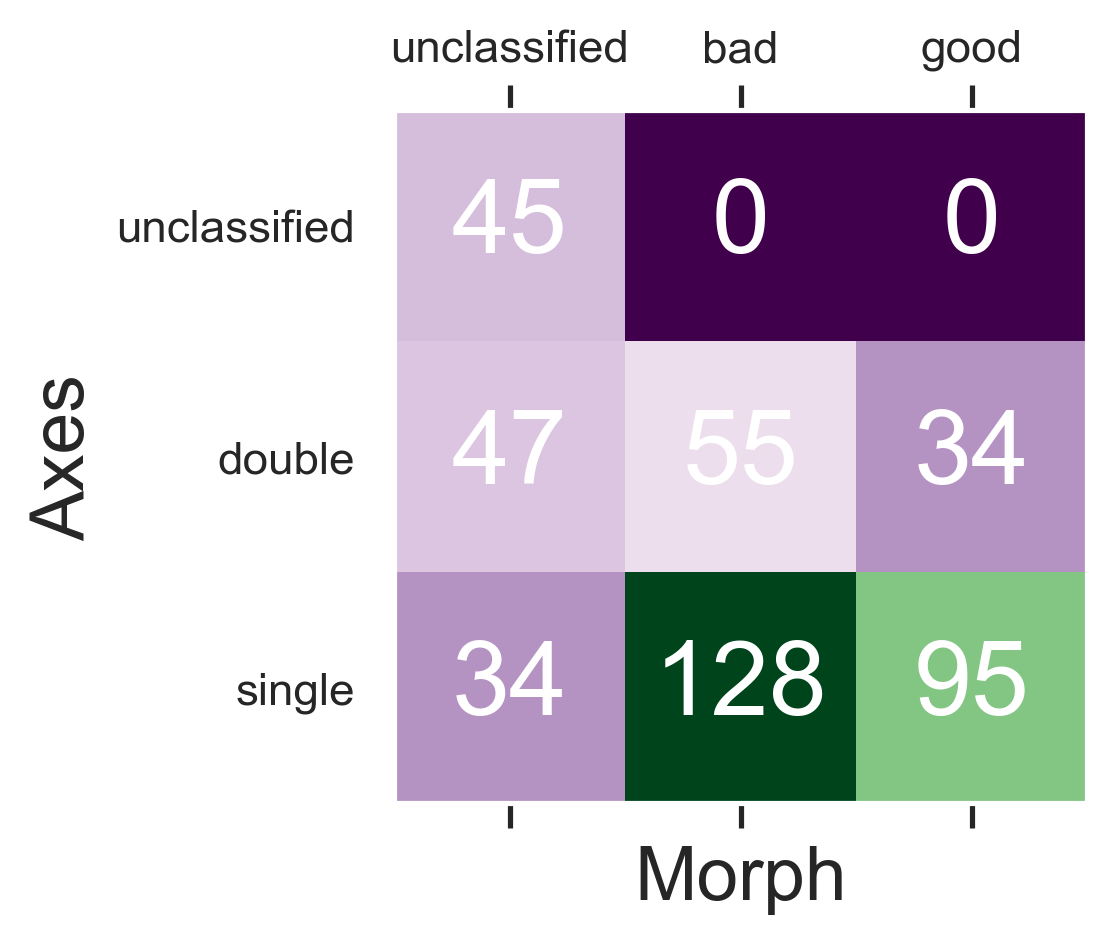

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

sns.set()
conf_matrix = confusion_matrix(y_true=axes_numerical, y_pred=morph_numerical)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.PRGn, alpha=1)
for i,name_ax in enumerate(["double","single","unclassified"]):
    for j,name_mo in enumerate(["bad","good","unclassified"]):
        #ax.text(x=j-0.015, y=i-0.015,s=conf_matrix[i, j], va='center', ha='center', size=20,color = "black")
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size=25,color = "white")
ax.grid(False)
plt.xlabel('Morph', fontsize=18)
plt.ylabel('Axes', fontsize=18)
ax.set_yticks([0,1,2],["unclassified","double","single"])
ax.set_xticks([0,1,2],["unclassified","bad","good"])



out_fig_2 = home_directory + "/" + r"Plots\Fig 2"

plt.savefig(f"{out_fig_2}/Confusion Matrix Annotation Results.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [6]:
no_na_annot.Morph.value_counts()

Morph
bad             183
good            129
unclassified    126
Name: count, dtype: int64

In [7]:
no_na_annot.Axes.value_counts()

Axes
single          257
double          136
unclassified     45
Name: count, dtype: int64

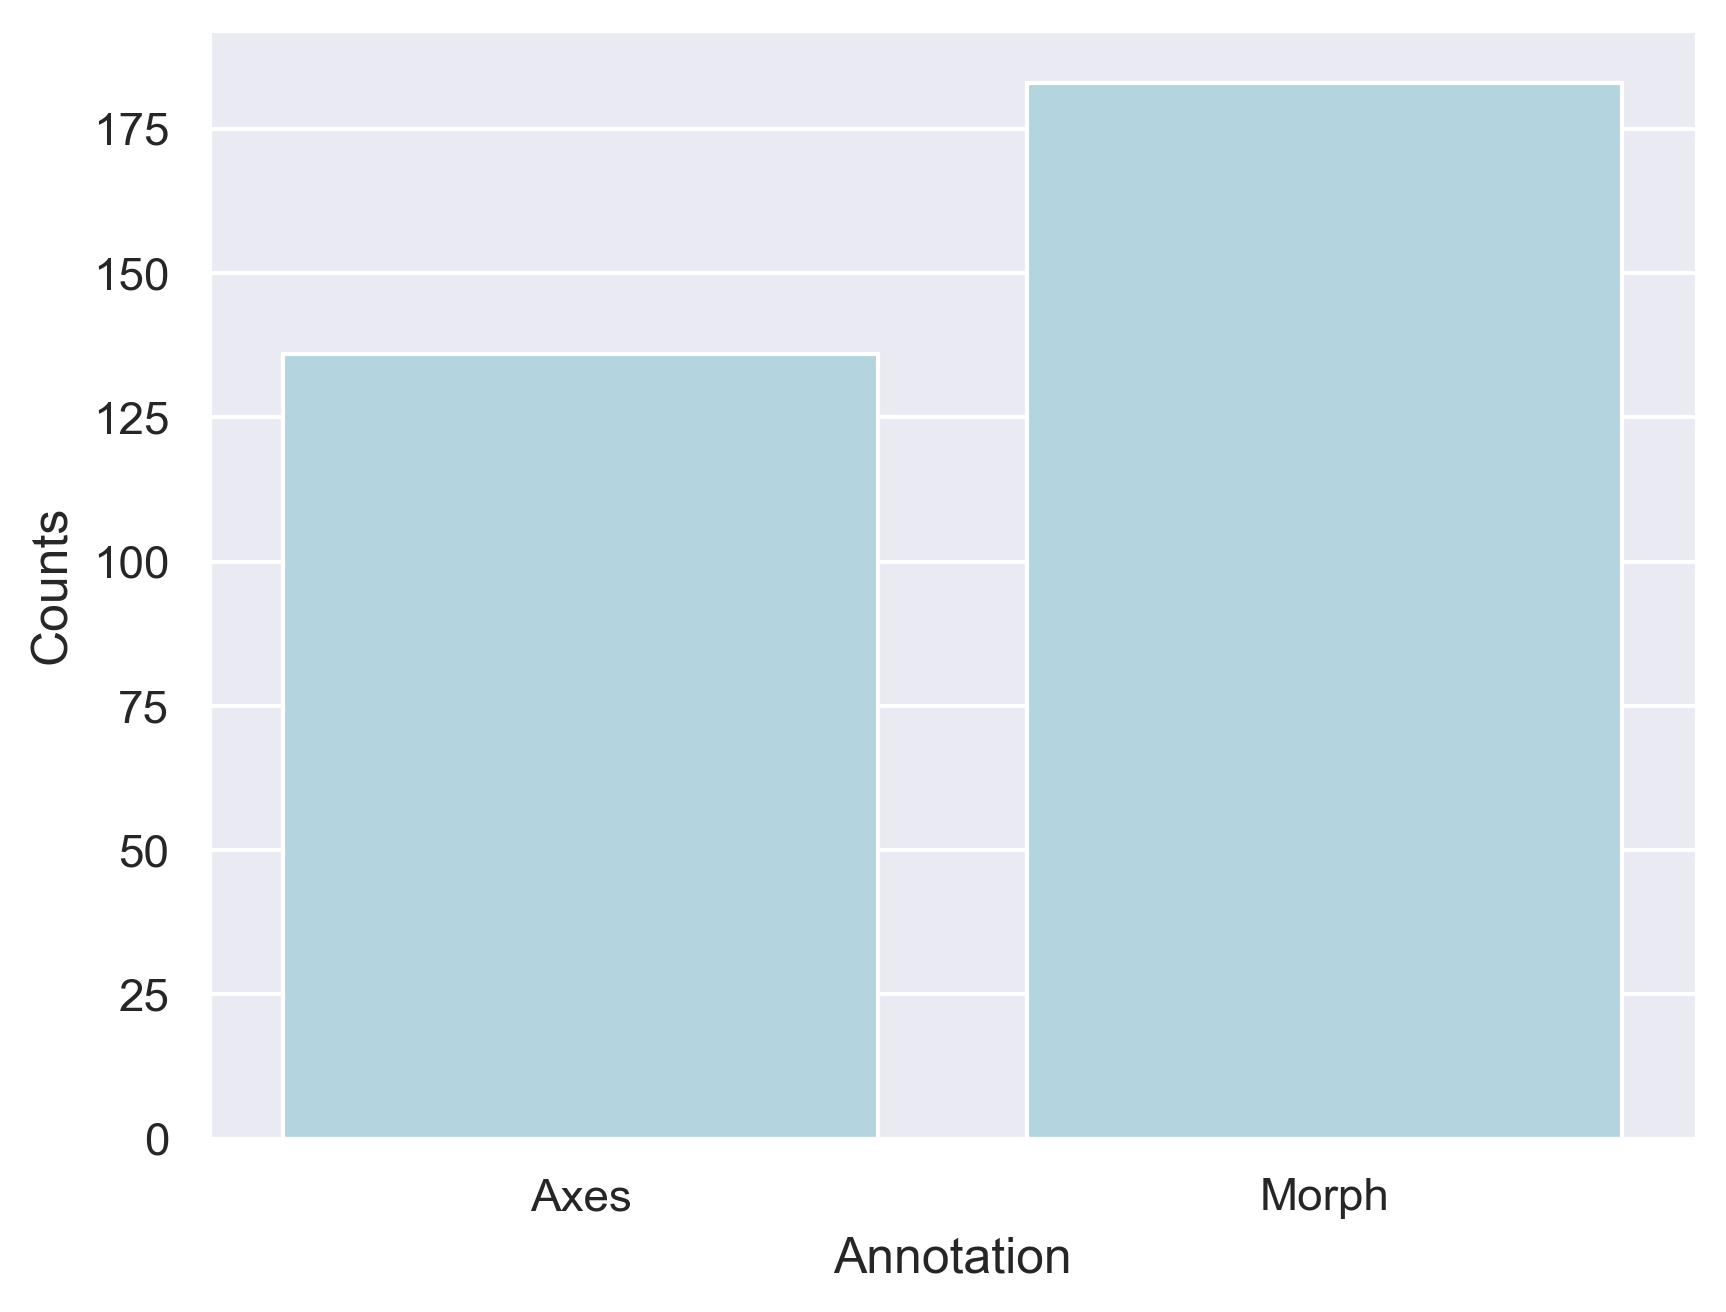

In [8]:
data_bad = pd.DataFrame({
    "Annotation":["Axes","Morph"],
    "Counts":[136,183],
})

data_good = pd.DataFrame({
    "Annotation":["Axes","Morph"],
    "Counts":[136,183],
})

plt.figure()

bar_bad = sns.barplot(data_bad,x="Annotation",y="Counts",color='darkblue')
bar_good= sns.barplot(data_good,x="Annotation",y="Counts", estimator=sum, errorbar=None,  color='lightblue')





# show the graph
plt.show()

0.0
0.3333333333333333
0.6666666666666666
1.0


Text(0.5, 0, '')

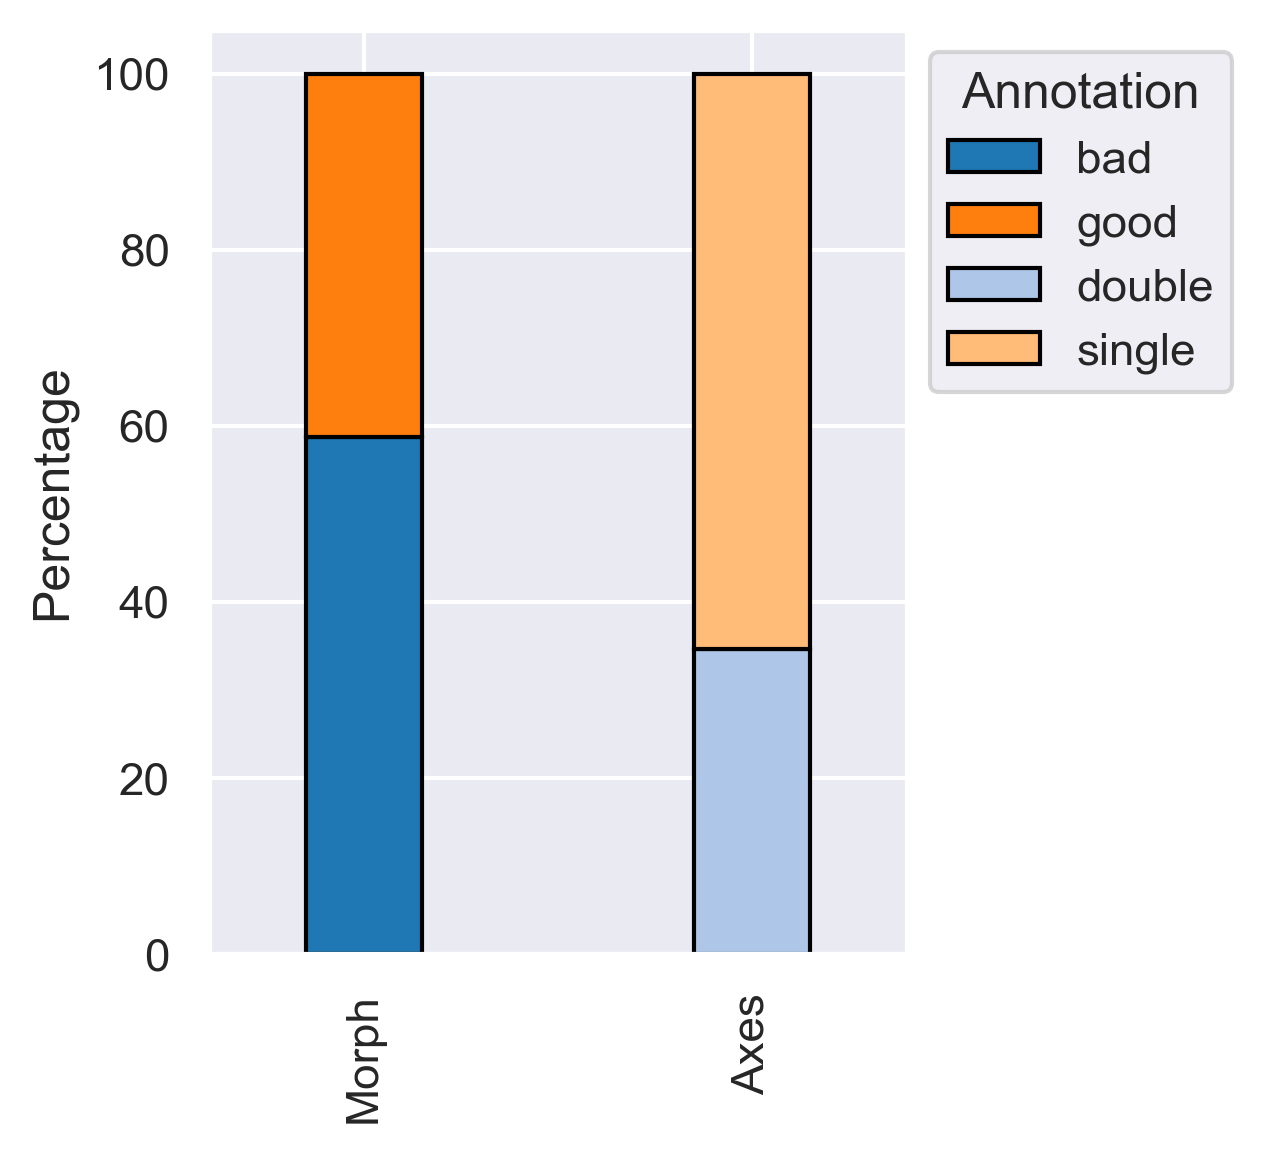

In [9]:
morph_vals = no_na_annot[no_na_annot["Morph"]!="unclassified"]["Morph"].to_numpy()
axes_vals = no_na_annot[no_na_annot["Axes"]!="unclassified"]["Axes"].to_numpy()

sns.set()

annotations_reformed = pd.DataFrame({
    "Annotation": np.concatenate((morph_vals,axes_vals)),
    "Annotation Type": np.concatenate((np.full_like(morph_vals,"Morph"),np.full_like(axes_vals,"Axes")))
})

df = (annotations_reformed
      .groupby("Annotation Type",)["Annotation"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

df = df[["bad","good","double","single"]].sort_values('Annotation Type',ascending=False)

cmap = mpl.colormaps["tab20"]
def cmap_mod(i):
    print(i)
    mapping = [0,2,1,3]
    return cmap(int(mapping[int(i*3)]))

fig, ax = plt.subplots(figsize = (3, 4))
# Plot
test = df.plot(
    kind = "bar",
    stacked = True,
    ax = ax,
    width = 0.3,
    edgecolor = "black",
    colormap=cmap_mod,
)
sns.move_legend(test, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel("Percentage")
ax.set_xlabel("")

In [10]:
sns.set_style({
    'axes.facecolor': '#EAEAF2',
    'axes.edgecolor': '2f2f2f',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': '.15',
    'figure.facecolor': 'white',
    'grid.color': '#3f3f3f',
    'grid.linestyle': '-',
    'text.color': 'black',
    'xtick.color': '2f2f2f',
    'ytick.color': '2f2f2f',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    #'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
    #'patch.edgecolor': 'black',
    'patch.force_edgecolor': False,
    
    'xtick.bottom': False,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
})

0.0
0.3333333333333333
0.6666666666666666
1.0


Text(0.5, 0, '')

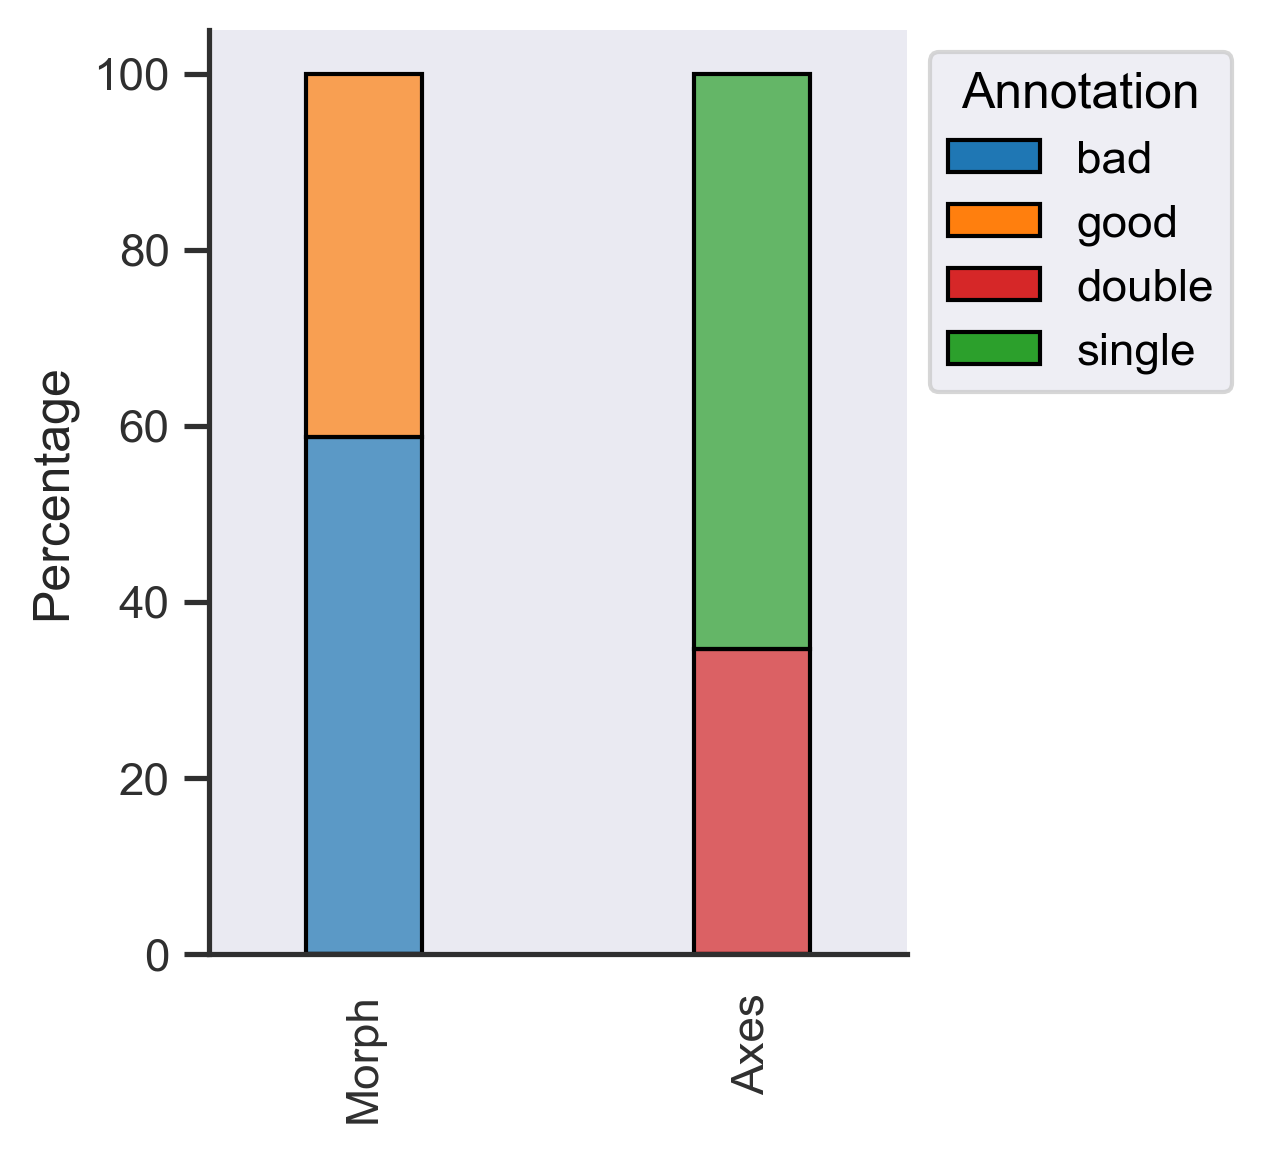

In [11]:
cmap = mpl.colormaps["tab10"]
def cmap_mod(i):
    print(i)
    mapping = [0,1,3,2]
    return cmap(int(mapping[int(i*3)]))

fig, ax = plt.subplots(figsize = (3, 4))
# Plot
test = df.plot(
    kind = "bar",
    stacked = True,
    ax = ax,
    width = 0.3,
    edgecolor = "black",
    colormap=cmap_mod,
)
sns.move_legend(test, "upper left", bbox_to_anchor=(1, 1))

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))

ax.set_ylabel("Percentage")
ax.set_xlabel("")

In [12]:
from matplotlib.colors import to_hex,to_rgb
to_hex(cmap(1))

'#ff7f0e'

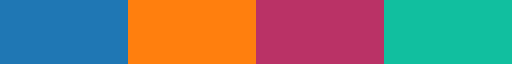

In [13]:
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, Colormap

cmap_new = ListedColormap([cmap(0),cmap(1),to_rgb('#CCE6F4'),to_rgb('#ba324f')])
cmap_new_alt = ListedColormap([cmap(0),cmap(1),to_rgb('#BA3266'),to_rgb('#11BF9F')])
cmap_new_alt

0.0
0.3333333333333333
0.6666666666666666
1.0


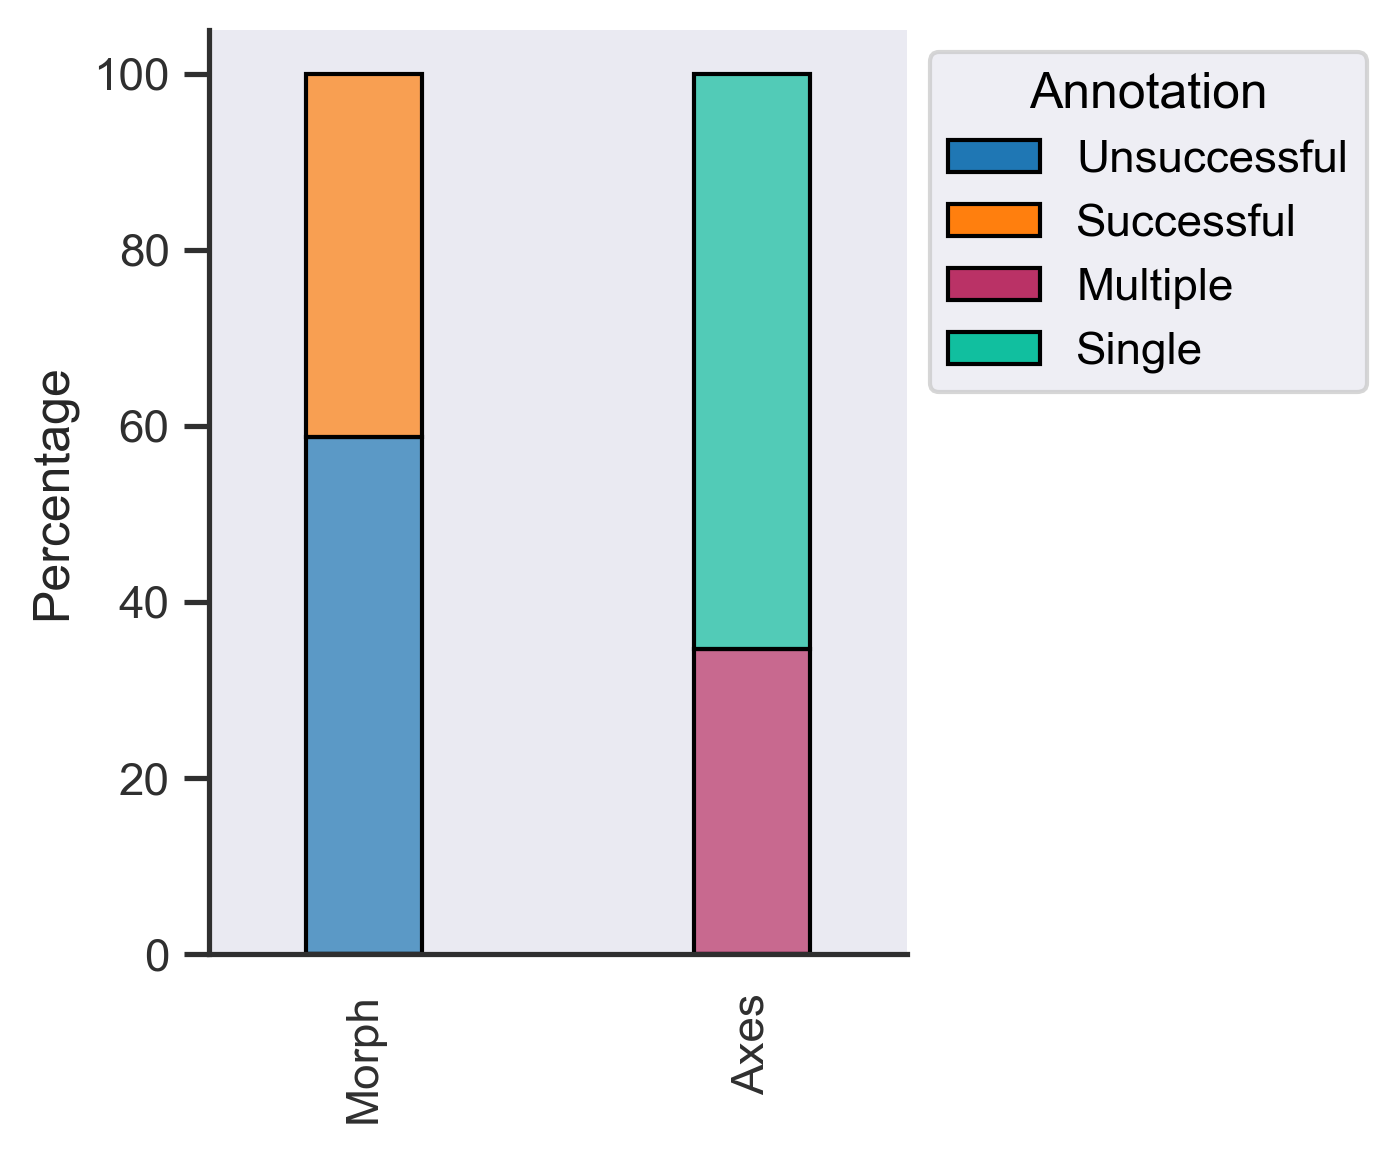

In [18]:
def cmap_mod(i):
    print(i)
    mapping = [0,1,2,3]
    return cmap_new_alt(int(mapping[int(i*3)]))

df_new_names = df.rename(columns = {"single": "Single", "double" : "Multiple", "bad" : "Unsuccessful", "good" : "Successful"})

fig, ax = plt.subplots(figsize = (3, 4))
# Plot
test = df_new_names.plot(
    kind = "bar",
    stacked = True,
    ax = ax,
    width = 0.3,
    edgecolor = "black",
    colormap=cmap_mod,
)
sns.move_legend(test, "upper left", bbox_to_anchor=(1, 1))

for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_facecolor(tuple(list(clr[:-1])+[0.7]))

ax.set_ylabel("Percentage")
ax.set_xlabel("")
plt.savefig(f"{home_directory}/Plots/Annotation Results Stacked Barplot.pdf", format="pdf", bbox_inches="tight")


In [15]:
np.save("custom_colormap(blur,orange,red,ice).npy",np.array([to_hex(color) for color in cmap_new_alt.colors]))